In [22]:
import sys 
import os 
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import tqdm
sys.path.append('../')

In [23]:
from src.utils.quantizer import Normalizer
from src.linear_compress import LinearQuantizedSparse

In [24]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [27]:
# linear_layer = "layer_1/mlp.up_proj"
with torch.no_grad():
    weights = glob.glob("/data/lliu/huffman/models/*/*/original_weights/*/*.pt")
    mus = []
    d_ins = []
    d_outs = []
    print(weights)
    for weight_fn in tqdm.tqdm(weights):
        weight = torch.load(weight_fn)["weight"].detach()
        _,weight_normalized = Normalizer.normalize_init(weight, [0,1], [False,False],norm_rescale=True, powers=1)
        
        d_out,d_in = weight_normalized.shape
        mu = torch.max(torch.abs(weight_normalized))*np.sqrt(np.prod(weight_normalized.shape))/torch.norm(weight_normalized)
        # print(f"mu: {mu}")
        mus.append(mu.item())   
        d_ins.append(d_in)
        d_outs.append(d_out)
        
        
    # linear_layer = "layer_0/self_attn.q_proj"
    # weight = f"/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/original_weights/{linear_layer}.pt"

['/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_3/mlp.gate_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_3/mlp.up_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_3/self_attn.q_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_3/self_attn.k_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_3/self_attn.o_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_3/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_3/self_attn.v_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_5/mlp.gate_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_5/mlp.up_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-70b-hf/original_weights/layer_5/self_attn.q_proj.pt', '/data/lliu/huffma

  0%|          | 0/1288 [00:00<?, ?it/s]

/tmp/ipykernel_1098794/3458365588.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weight = torch.load(weight_fn)["weight"].detach()
100%|██████████| 1288/1288 [03:05<00:

In [26]:
mus

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [29]:
mus = np.array(mus)
d_ins = np.array(d_ins)

In [30]:
d_ins_unique = np.unique(d_ins)

mus_binned = []

for d_in in d_ins_unique:
    mus_binned.append(mus[d_ins==d_in])
    

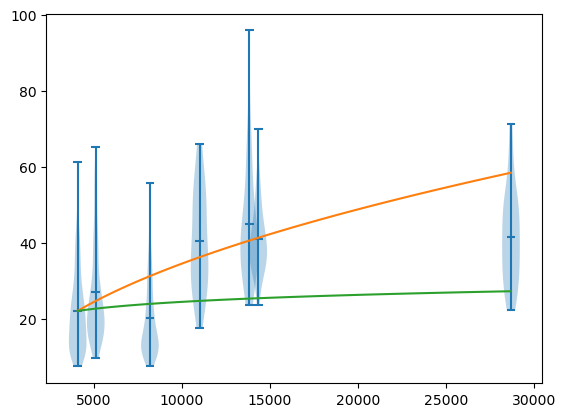

In [44]:
plt.violinplot(mus_binned, d_ins_unique, showmeans=True, widths = 1000)

x = np.linspace(min(d_ins), max(d_ins), 100)
y = np.sqrt(x)
y2 = np.log(x)
y *= mus_binned[0].mean()/y[0]
y2 *= mus_binned[0].mean()/y2[0]

plt.plot(x,y, label="sqrt(d_in)*100")
plt.plot(x,y2, label="log(d_in)*100")
# plt.xscale("log")